<a href="https://www.kaggle.com/code/nainapandey96/digit-recognizer-cnn?scriptVersionId=106437813" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CONVULATION NEURAL NETWORK FROM SRATCH ON MNIST HANDWRITTEN DIGIT

A deep neural network is used for handling large datasets. We have many kinds of ANN for specific tasks like using LSTM for NLP. Similarly, we have a neural network that works for images. 

The AI system, which became known as AlexNet (named after its main creator, Alex Krizhevsky), won the 2012 ImageNet computer vision contest with an amazing 85 percent accuracy. The runner-up scored a modest 74 percent on the test.
At the heart of AlexNet were Convolutional Neural Networks a special type of neural network that roughly imitates human vision. Over the years CNNs have become a very important part of many Computer Vision applications. So let's take a look at the workings of CNNs.


## HUMAN VISUAL AND CNN

![](http://cdn-images-1.medium.com/max/1200/1*lHJ0dsKEHGgft4tvGSdEEQ.png)

The idea of CNN was neurobiological motivated by the findings of locally sensitive and orientation-selective nerve cells in the visual cortex. Inventors of CNN designed a network structure that implicitly extracts relevant features. they are special kind of neural network. 
![](https://cdn-images-1.medium.com/max/1200/1*5jHSOTMYNHtwZz-zoPDOBA.png)

In mathematics **convolution** is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.


The core idea behind the CNN:

* Local Connections: Represent how each set of neurons in a cluster disconnected to each other, which in turn represents set of features.
* Layering: Represents the hierarchy in features that are learned.
* Spatial Invariance: Represents the capability of CNN to learn abstractions invariant of size, contrast, rotation and variation.

Some famous CNN are:
* LeNet, 1998
* AlexNet,2012
* VGGNet, 2014
* ResNet, 2015
![](https://cdn-images-1.medium.com/max/1200/1*WIualtW3hcZrTJ271nCwHQ.png)

So with this we are done with history of CNN and went through some famous CNN's. Lets get down its working.

## Working of CNN

Lets understand what is image first. Image is a matrix with pixel values. If image is gray scale it has only one plane with pixel values 0 or 1. If image is in RGB, then it will have three color channels. It means it will have 3 planes.
![](https://cdn-images-1.medium.com/max/1200/0*VICTxt7DJHFzZHln.png)
CNN works of specific details rather than the whole image. Its covinent and effective to represent a smaller region with fewer parameters, thereby reducing reducing computational complexity. 

![](https://cdn-images-1.medium.com/max/1200/1*Hdlq0QDTPgHjMwuI_nGweQ.png)

CNN have what we call as convolution layer. It works as a filter above the image, applying which we get a convolved feature. This feature is passed on to next layer.
![](https://cdn-images-1.medium.com/max/1200/0*48GVrt_bOvmgk01q.gif)

Filters can be considered as network parameters to be learned. If you change the stride size, the convoluted output will vary(only outputting intense pixel). When RGB image is used as input to CNN, the depth of filter is always equal to the depth of image (3 in case of RGB and 1 in grayscale).

## What is Pooling Layer?

The pooling layer gradually reduces the spatial size of each matrix within the feature map such that the amount of parameters and computation is reduced in the network. The most common used pooling approach is max pooling.

![](https://cdn-images-1.medium.com/max/1200/1*3yaRJLXL7wLO30lO6d7RHQ.png)

The **CNN Architecture** compromises multiple combinations of convolution and pooling layers. Resultant image is smaller than the original image. the reduced image from these layers (convolution+pooling) is then passed through the activation function.

![](https://cdn-images-1.medium.com/max/1200/1*lcw96OJTT8Ec5gMLucDKVA.png)

So with this we are done with theory. There are other things for you to ponder upon like deep CNN or how these networks are different from fully connected ANN? Lets jump into implementation.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#Import libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd
import datetime
%matplotlib inline

In [3]:
df_train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
feature= df_train.drop('label', axis=1)
target= df_train.label
feature_new= feature.values.reshape(-1,28,28,1)
df_test_new=df_test.values.reshape(-1,28,28,1)
feature_new.shape

(42000, 28, 28, 1)

We will convert target variable to categorical using one hot encoding. We have 10 classes. to_categorical() will work for you. We will convert integers to float and normalize the data by dividing all values by 255.0. Why 255? That is something for you to find out.

In [5]:
feature_new= feature_new.astype('float32')
df_test_new=df_test_new.astype('float32')
#normalizing
feature_new= feature_new/255
df_test_new=df_test_new/255

In [6]:
target_new=to_categorical(target, num_classes=10)

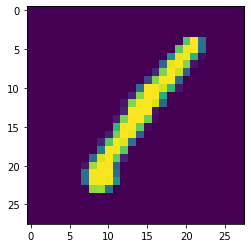

In [7]:
plt.imshow(feature_new[0])

Now we are done with preparing our feature and target. We will begin now with our baseline model. Our baseline model will have two parts:
1. Base CNN model with one Conv2D and one pooling layer.
2. Another part is a classifier to predict the class.

In [8]:
##Baseline model 
model= keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')   
])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model.compile(optimizer='SGD',
              loss='CategoricalCrossentropy',
              metrics=['accuracy']
             )
history=model.fit(feature_new,target_new, epochs=15)

2022-09-24 15:44:17.898644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 15:44:17.998092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 15:44:17.999166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 15:44:18.001401: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/15


2022-09-24 15:44:22.286378: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1313/1313 [==============================] - 11s 3ms/step - loss: 0.5591 - accuracy: 0.8473
Epoch 2/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2518 - accuracy: 0.9253
Epoch 3/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1955 - accuracy: 0.9421
Epoch 4/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1607 - accuracy: 0.9521
Epoch 5/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1360 - accuracy: 0.9604
Epoch 6/15
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1172 - accuracy: 0.9649
Epoch 7/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1042 - accuracy: 0.9690
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0933 - accuracy: 0.9722
Epoch 9/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0852 - accuracy: 0.9743
Epoch 10/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0777 - accura

with baseline we are getting 98.20% accuracy. So now we will tinker with our model and use some other layers to see if our accuracy increases.

## Batch Normalization

First thing we will use is BatchNormalization(). Why BatchNormalization?

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.
It is used to perform the standardizing and normalizing operations on the input of a layer coming from a previous layer. A typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input.
So lets implement it with our baseline and check if it makes any difference.


In [9]:
model_batch= keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax')   
])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_batch.compile(optimizer='SGD',
              loss='CategoricalCrossentropy',
              metrics=['accuracy']
             )
history=model_batch.fit(feature_new,target_new, epochs=15)

Epoch 1/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.1831 - accuracy: 0.9479
Epoch 2/15
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0773 - accuracy: 0.9792
Epoch 3/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0545 - accuracy: 0.9858
Epoch 4/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0433 - accuracy: 0.9887
Epoch 5/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9912
Epoch 6/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0281 - accuracy: 0.9934
Epoch 7/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0234 - accuracy: 0.9945
Epoch 8/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0192 - accuracy: 0.9961
Epoch 9/15
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0160 - accuracy: 0.9973
Epoch 10/15
1313/1313 [==============================] - 4s 3ms/step - loss: 0.014

So thats a tremendous improvement in our accuracy by just using batch normalization. 

We will try to implement VGG like pattern and see what our results will be. For that architecture is something like
Input layer
* Batch Normalization
* 2 layers of Conv2D
* 1 layer of pooling
* and our classifier

In [10]:
#VGG like pattern
model_vg= keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation='softmax')   
])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_vg.compile(optimizer='SGD',
              loss='CategoricalCrossentropy',
              metrics=['accuracy']
             )
history=model_vg.fit(feature_new,target_new, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1480 - accuracy: 0.9610
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0588 - accuracy: 0.9841
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0399 - accuracy: 0.9900
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0299 - accuracy: 0.9929
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0239 - accuracy: 0.9944
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0179 - accuracy: 0.9962
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0144 - accuracy: 0.9974
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0109 - accuracy: 0.9986
Epoch 9/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0094 - accuracy: 0.9988
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.007

In [11]:
test_predict=model_vg.predict(df_test_new)

In [12]:
test_predict

array([[2.8319146e-06, 1.3214886e-07, 9.9998426e-01, ..., 1.6143829e-06,
        1.1277303e-06, 1.0240271e-06],
       [9.9768472e-01, 4.0521434e-05, 1.3845240e-03, ..., 1.0492284e-04,
        5.1360614e-05, 4.8459960e-06],
       [5.6264639e-06, 3.8096528e-06, 1.4444838e-03, ..., 4.6333034e-06,
        4.0340523e-04, 9.9801207e-01],
       ...,
       [8.5132194e-07, 5.4268385e-06, 4.3064242e-06, ..., 1.1003532e-05,
        1.2407074e-05, 5.4650113e-06],
       [1.3601066e-03, 1.3388912e-05, 1.1827161e-05, ..., 1.5115459e-05,
        5.3224387e-05, 9.9801540e-01],
       [6.6732184e-08, 2.8184919e-08, 9.9999690e-01, ..., 1.5161012e-08,
        1.6992926e-06, 2.3713775e-07]], dtype=float32)

In [13]:
predict=np.argmax(test_predict, axis=1)
predict[:5]

array([2, 0, 9, 9, 3])

In [14]:
submission=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label']=predict
submission.to_csv('submission.csv', index=False)

so with this we have learnt so many things today. We learnt about CNN , its history and went through its implementation. There is so much more about CNN , I mean there are literally books written on one topic. But this article will give you a start on CNN. I hope this article gave a basic start point for computer vision. 
Thank you all for reading my article.


Follow me on [@NancyPandey](https://www.linkedin.com/in/nancy-pandey-08595987/)